# Machine Learning Application

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline

## Logistic Regression

$2$次元の入力$x_{1},x_{2}$から2値の出力ラベル$y=1\text{ or }0$を予測する。<br>
Logistic回帰モデルを、下記に示す。

\begin{align*}
p(x_{1},x_{2}) &= \varsigma(w_{0}+w_{1}x_{1}+w_{2}x_{2})
\end{align*}

#### 1. $\sigma(0.5)$の計算

sigmoid関数は、次の式で表される。<br>
$$\varsigma(x)=\frac{1}{1+\exp(-x)}$$

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0.5)

0.6224593312018546

#### 2. パラメータを$(w_{0}, w_{1}, w_{2})=(0.5, 1.0, -1.0)$とした時の、以下4つのデータポイントに対するラベル$y=1$の予測確率

|$x_{1}$|$x_{2}$|$y$|
|:--:|:--:|:--:|
|1|1|1|
|0|1|1|
|1|0|1|
|0|0|0|

$x = w_{0}+w_{1}x_{1}+w_{2}x_{2}$を代入

In [35]:
def pred(x, w):
    return sigmoid(w[0] + x@w[1:])

X = np.array([[1, 1], 
              [0, 1],
              [1, 0],
              [0, 0]])

w = np.array([0.5, 1.0, -1.0])

pred(X, w)

array([0.62245933, 0.37754067, 0.81757448, 0.62245933])

計算を分かりやすく可視化

In [36]:
print(sigmoid(0.5 + 1*1 + 1*(-1)))
print(sigmoid(0.5 + 1*0 + 1*(-1)))
print(sigmoid(0.5 + 1*1 + 0*(-1)))
print(sigmoid(0.5 + 1*0 + 1*0))

0.6224593312018546
0.3775406687981454
0.8175744761936437
0.6224593312018546


尚、予測値の値は0.5を閾値とすれば[1, 0, 1, 1]となるが<br>
これは**あくまで予測値**のため、正解ラベルと一致するとは限らない。

#### 3. クロスエントロピー誤差関数$E$について計算し、標本平均を算出
\begin{align*}
E &= -y\log p(x_{1},x_{2}) -(1-y)\log(1-p(x_{1},x_{2}))
\end{align*}

それぞれの予測値と正解値を用いて、誤差を評価する。<br>
**正解値との誤差**を調べるために、ここではじめて正解値を使用する。

In [37]:
y = np.array([1, 1, 1, 0])

cross_entropy = - y*np.log(pred(X, w)) - (1 - y) * np.log(1 - pred(X, w))

print(cross_entropy)
print('mean:', cross_entropy.mean())

[0.47407698 0.97407698 0.20141328 0.97407698]
mean: 0.6559110576307682


## Decision Tree Regressor

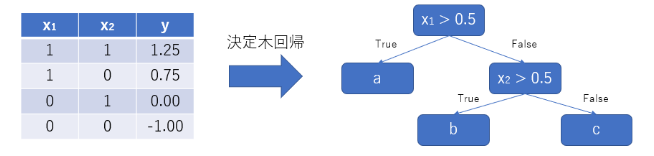

決定木回帰モデルは、2乗損失$l(y,\hat{y})=(y-\hat{y})^2$,（$\hat{y}$は$y$の予測値）を使用

#### 1. a, b, cの値

$x_1>0.5$を満たすのは、表1・2行目のみであるため、それらのyの平均値を計算すると、$a=1$となる。<br>
$x_1>0.5$かつ$x_2>0.5$を満たすのは、表3行目のみであるため、yの平均値はそのまま$b=0$となる。<br>
$x_1>0.5$かつ$x_2<0.5$を満たすのは、表4行目のみとあるため、yの平均値はそのまま$c=0$となる。

#### 2. 入力変数$x_{1}$, $x_{2}$の変数重要度

[0.81818182 0.18181818]


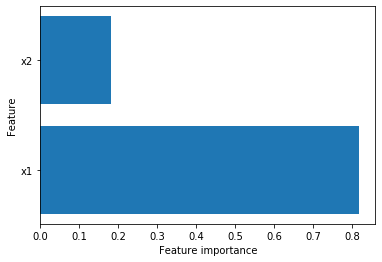

In [38]:
X = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
y = np.array([1.25, 0.75, 0.00, -1.00])

dtr = DecisionTreeRegressor(max_leaf_nodes = 3)
dtr.fit(X, y)

print(dtr.feature_importances_)

def plot_feature_importances_cancer(model):
    n_features = X.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['x1', 'x2'])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(dtr)

次に、2乗損失 𝑙(𝑦,𝑦̂ ) の代わりに絶対値損失 𝑙(𝑦,𝑦̂ )=|𝑦−𝑦̂ | を用いたところ、2乗損失の場合と分割領域が同じ予測式が得られた。

#### 3. このときの 𝑦 の予測値 𝑎,𝑏,𝑐 の値と、その根拠を説明

2乗損失の場合に、予測値が分割領域に属するデータポイントの標本平均になるのは、平均2乗損失を最小化するために必要であった。<br>
同様のことを絶対値損失の場合に考えると、予測値は分割領域に属するデータポイントの中央値になることが分かる。<br>
したがって、$a=1, b=0, c=-1$となる。

## Kernel SVM

次のようなデータを多項式カーネルのサポートベクトル分類モデルで学習させ、1次元の入力$x$から出力ラベル$y$を予測する。<br>

|$x$|$y$|
|:--:|:--:|
|-2|-1|
|-1|+1|
|0|-1|
|1|+1|
|2|-1|

逆正則化ハイパーパラメータは適当に選択して良いものとする。

また多項式カーネルとは、ある正の整数$d$によって$K(x,x')=(1+xx')^d$と定義されるものとし<br>
特に$d$を多項式カーネルの次数と呼んでいるものとする。

#### 1. 学習した結果、与えられたデータに対する予測の正答率（訓練データの正答率）が$1.0$になるような多項式カーネルの次数の最小値

4次の多項式カーネル。 𝑥 の4次式を判別関数として実現すれば出力 𝑦 を予測できる。<br>
以下の様に、4次の多項式カーネルの正答率が 1.0 になることは、sklearn packageを用いて確認することも可能である。

degree：次数

In [39]:
X = np.array([[2.0], [1.0], [0.0], [-1.0], [-2.0]])
y = np.array([0, 1, 0, 1, 0])

svc = SVC(C = 10.0, kernel = "poly", coef0 = 1.0, degree = 4)
svc.fit(X, y)

svc.score(X, y)

1.0

次に、`sklearn.datasets`モジュールの`make_moons`メソッドを用いてmoonsデータセットを生成した。<br>
パラメータの設定は下記の通りである。

* `n_samples = 100`
* `noise = 0.15`

このデータセットに対して2次元の入力$X$から出力ラベル$y$を予測する式を得るべく、RBFカーネルのサポートベクトル分類器を学習させた。

#### 2. `C=0.001`, `gamma=0.1`に対応するグラフを出力

上記のパラメータで、RBFカーネルのサポートベクトル分類器を学習させればすぐに分かる。

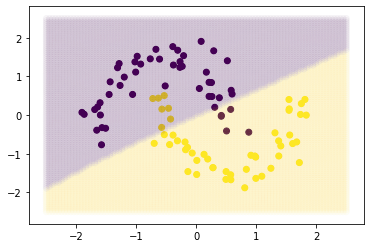

In [53]:
X_train, y_train = make_moons(n_samples = 100, noise = 0.15, random_state=0)

std = StandardScaler()
X_train = std.fit_transform(X_train)

svc = SVC(kernel='rbf', C = 0.001, gamma = 0.1)
svc.fit(X_train, y_train)

x0 = np.linspace(start = -2.5, stop = 2.5, num = 100)
x1 = np.linspace(start = -2.5, stop = 2.5, num = 100)
xx0, xx1 = np.meshgrid(x0, x1)
X_test = np.c_[xx0.ravel(), xx1.ravel()]

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = svc.predict(X_test), alpha = 0.03)
plt.show()

下記のようにパイプラインを使用しても良い。

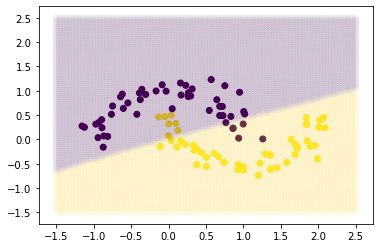

In [54]:
X_train, y_train = make_moons(n_samples = 100, noise = 0.15, random_state=0)

svc = Pipeline([("scaler", StandardScaler()), ("learner", SVC(kernel = "rbf", C = 0.001, gamma = 0.1))])
svc.fit(X_train, y_train)

x0 = np.linspace(start = -1.5, stop = 2.5, num = 100)
x1 = np.linspace(start = -1.5, stop = 2.5, num = 100)
xx0, xx1 = np.meshgrid(x0, x1)
X_test = np.c_[xx0.ravel(), xx1.ravel()]

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = svc.predict(X_test), alpha = 0.03)
plt.show()